In [2]:
import pandas as pd
import numpy as np

In [3]:
housing =pd.read_csv('housing_Azubi.csv')

Let’s take a look at the top five rows using the DataFrame’s head() method

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes (you can see the first 6 in the screenshot):longitude, latitude, housing_median_age, total_rooms, total_bed rooms, population, households,median_income, median_house_value, and ocean_proximity.The info() method is useful to get a quick description of the data, in particular the total numberof rows, and each attribute’s type and number of non-null values:

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20.640 instances in the dataset, which means that it is fairly small by Machine Learningstandards, but it’s perfect to get started. Notice that the total_bed rooms attribute has only20,433 non-null values, meaning that 207 districts are missing this feature. We will need to takecare of this later.All attributes are numerical, except the ocean_proximity field. Its type is object, so it could holdany kind of Python object, but since you loaded this data from a CSV file you know that it must bea text attribute. When you looked at the top five rows, you probably noticed that the values in theocean_proximity column were repetitive, which means that it is probably a categorical attribute.You can find out what categories exist and how many districts belong to each category by usingthe value_counts() method:

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the numerical attributes:

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored(so, for example, count of total_bedrooms is 20.433, not 20.640). The std row shows the stan-dard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows showthe corresponding percentiles: a percentile indicates the value below which a given percentageof observations in a group of observations falls. For example, 25% of the districts have a hous-ing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. Theseare often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rdquartile).Another quick way to get a feel of the type of data you are dealing with is to plot a histogram foreach numerical attribute. A histogram shows the number of instances (on the vertical axis) that5
have a given value range (on the horizontal axis). You can either plot this one attribute at a time, oryou can call the hist() method on the whole dataset, and it will plot a histogram for each numericalattribute. For example, you can see that slightly over 800 districts have a median_house_valueequal to about $100.000

In [9]:
import matplotlib.pyplot as plt

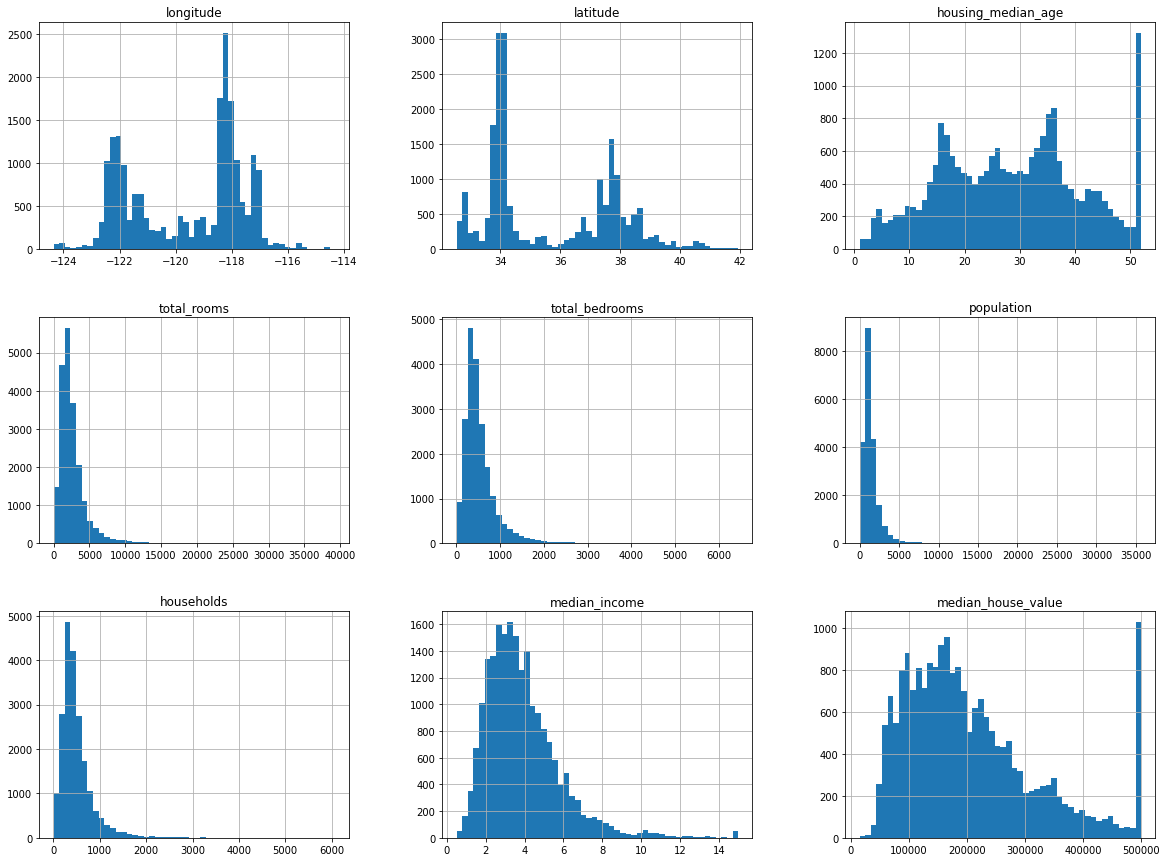

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Notice a few things in these histograms:1. First, the median income attribute does not look like it is expressed in US dollars (USD).After checking with the team that collected the data, you are told that the data has beenscaled and capped at 15 (actually 15,0001) for higher median incomes, and at 0,5 (actually0,4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars(e.g., 3 actually means about $30.000). Working with preprocessed attributes is common inMachine Learning, and it is not necessarily a problem, but you should try to understand howthe data was computed.2. The housing median age and the median house value were also capped. The latter may bea serious problem since it is your target attribute (your labels). Your Machine Learningalgorithms may learn that prices never go beyond that limit. You need to check with your6
client team (the team that will use your system’s output) to see if this is a problem or not. Ifthey tell you that they need precise predictions even beyond $500,000, then you have mainlytwo options:• Collect proper labels for the districts whose labels were capped.• Remove those districts from the training set (and also from the test set, since yoursystem should not be evaluated poorly if it predicts values beyond $500.000).3. These attributes have very different scales. We will discuss this later in this chapter when weexplore feature scaling.4. Finally, many histograms are tail heavy: they extend much farther to the right of the medianthan to the left. This may make it a bit harder for some Machine Learning algorithms todetect patterns. We will try transforming these attributes later on to have more bell-shapeddistributions.Hopefully you now have a better understanding of the kind of data you are dealing with.1.3.2 2.2 Explore and visualize the data to gain insightsSo far you have only taken a quick glance at the data to get a general understanding of the kind ofdata you are manipulating. Now the goal is to go a little bit more in depth.Visualizing Geographical DataSince there is geographical information (latitude and longi-tude), it is a good idea to create a scatterplot of all districts to visualize the data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

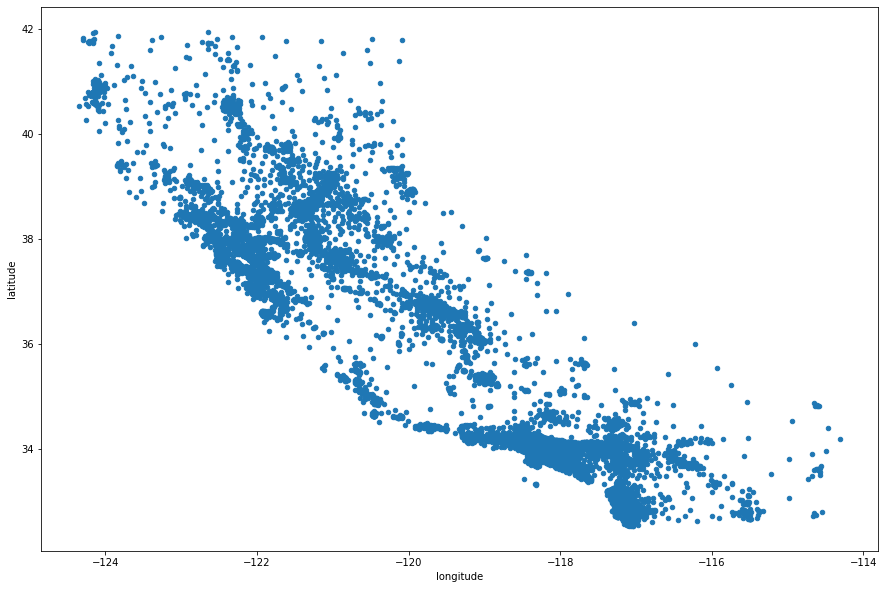

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,10))

This looks like California all right, but other than that it is hard to see any particular pattern.Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a highdensity of data points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

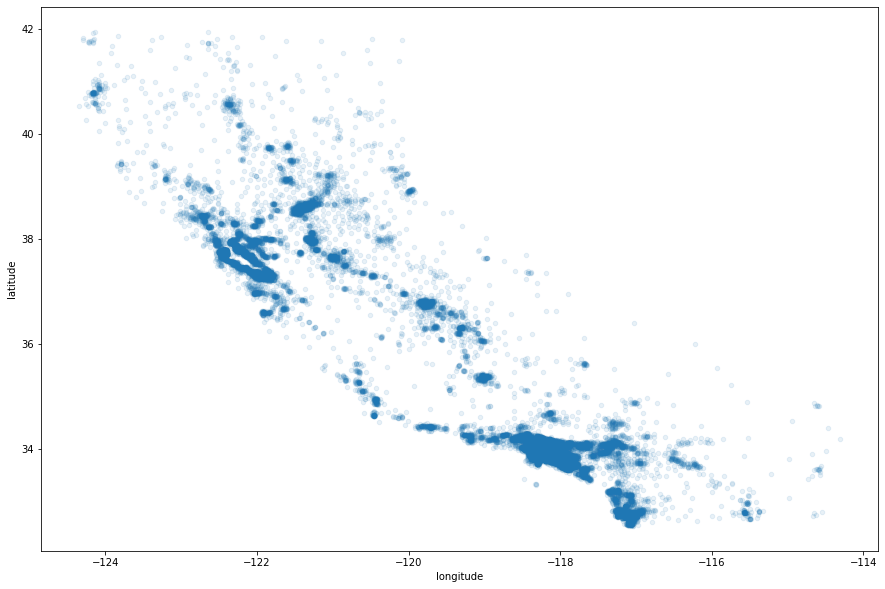

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(15,10))

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area andaround Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, inparticular around Sacramento and Fresno. More generally, our brains are very good at spottingpatterns on pictures, but you may need to play around with visualization parameters to make thepatterns stand out.Now let’s look at the housing prices (plot here below). The radius of each circle represents the dis-trict’s population (option s), and the color represents the price (option c). We will use a predefinedcolor map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

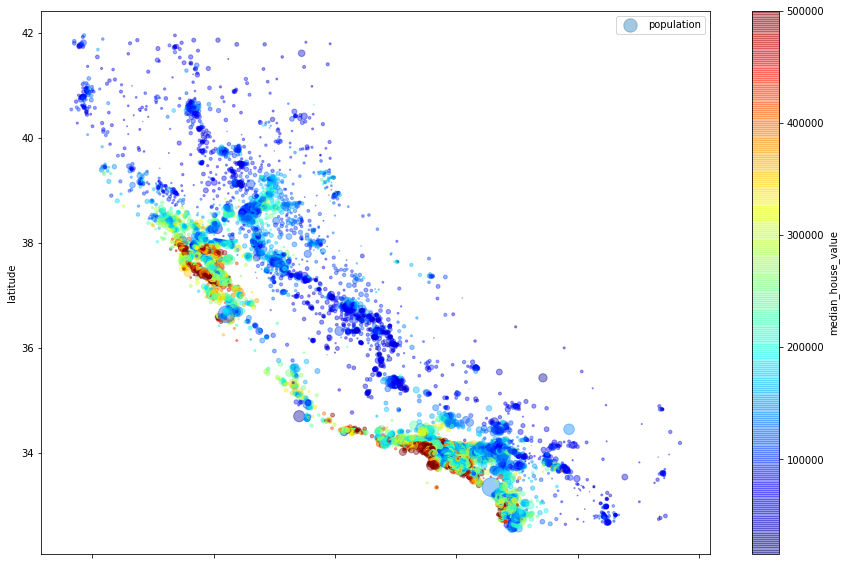

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(15,10),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close tothe ocean) and to the population density, as you probably knew already. It will probably be usefulto use a clustering algorithm to detect the main clusters, and add new features that measure theproximity to the cluster centers. The ocean proximity attribute may be useful as well, although inNorthern California the housing prices in coastal districts are not too high, so it is not a simplerule.Looking for CorrelationsSince the dataset is not too large, you can easily compute the stan-dard correlation coe฀cient (also called Pearson’s r) between every pair of attributes using the corr()method

In [19]:
corr_matrix=housing.corr()

In [ ]:
Now let’s look at how much each attribute correlates with the median house value:

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coeﬀicient ranges from –1 to 1. When it is close to 1, it means that there is a strongpositive correlation; for example, the median house value tends to go up when the median incomegoes up. When the coeﬀicient is close to –1, it means that there is a strong negative correlation;you can see a small negative correlation between the latitude and the median house value (i.e.,prices have a slight tendency to go down when you go north). Finally, coeﬀicients close to zeromean that there is no linear correlation.Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function,which plots every numerical attribute against every other numerical attribute. Since there are now11 numerical attributes, you would get 112 = 121 plots, which would not fit on a page, so let’s justfocus on a few promising attributes that seem most correlated with the median housing value

In [21]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

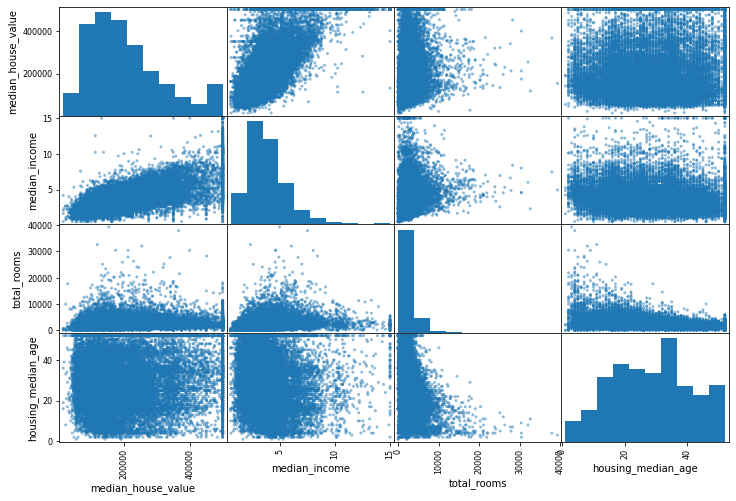

In [24]:
attributes=["median_house_value","median_income","total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted eachvariable against itself, which would not be very useful. So instead Pandas displays a histogram ofeach attribute (other options are available; see Pandas’ documentation for more details).The most promising attribute to predict the median house value is the median income, so let’szoom in on their correlation scatterplot

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

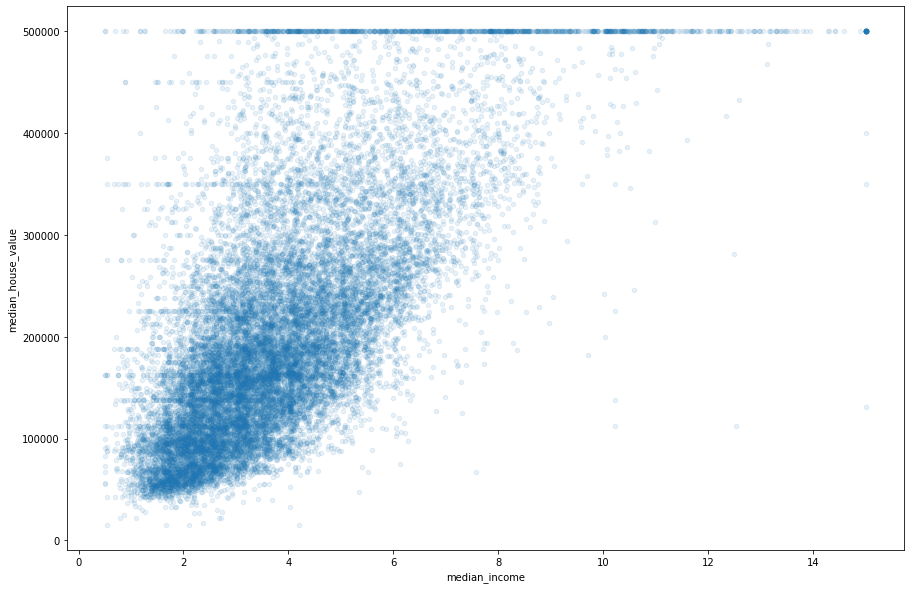

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, 
figsize=(15,10))

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see theupward trend and the points are not too dispersed. Second, the price cap that we noticed earlieris clearly visible as a horizontal line at $500.000. But this plot reveals other less obvious straightlines: a horizontal line around $450.000, another around $350.000, perhaps one around $280,000,and a few more below that. You may want to try removing the corresponding districts to preventyour algorithms from learning to reproduce these data quirks.1.3.3 2.4 Verify data qualityTo verify data quality, you must look for missing and outlier values, or other unusable data.Missing ValuesThe real-world data often has a lot of missing values. The cause of missingvalues can be data corruption or failure to record data. The handling of missing data is veryimportant during the preprocessing of the dataset as many machine learning algorithms do notsupport missing values.You can find out which features have missing values, either by applying pandas info() function orthe isnull() function:

In [27]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Outliers ValuesAn outlier is a data point that is noticeably different from the rest, that is, anextreme value. It may be due to variability in the measurement, or it may indicate measurementor execution error.Machine learning algorithms are sensitive to the range and distribution of attribute values. Dataoutliers can spoil and mislead the training process resulting in longer training times, less accuratemodels, and ultimately poorer results. In case of measurement or execution error, it is sometimesbest to exclude them from the dataset. However, sometimes it’s best to keep outliers in the data.They can capture valuable information.One way of identifying outliers is by visualizing the distribution. Box plots visually show thedistribution of numerical data through displaying the data quartiles (or percentiles) and averages.Box plots show the five-number summary of a set of data: including the minimum score, first(lower) quartile, median, third (upper) quartile, and maximum score.– Insert Image 1 –Definitions:• Minimum Score: The lowest score, excluding outliers (shown at the end of the left whisker).-Lower Quartile: Twenty-five percent of scores fall below the lower quartile value (also known asthe first quartile).• Median: The median marks the mid-point of the data and is shown by the line that dividesthe box into two parts (sometimes known as the second quartile). Half the scores are greaterthan or equal to this value and half are less.• Upper Quartile: Seventy-five percent of the scores fall below the upper quartile value (alsoknown as the third quartile). Thus, 25% of data are above this value.• Maximum Score: The highest score, excluding outliers (shown at the end of the right whisker).• Whiskers: The upper and lower whiskers represent scores outside the middle 50% (i.e. thelower 25% of scores and the upper 25% of scores).• The Interquartile Range (or IQR): This is the box plot showing the middle 50% of scores(i.e., the range between the 25th and 75th percentile).Box plots divide the data into sections that each contain approximately 25% of the data in thatset.– Insert Image 2 –Box plots are useful as they show the dispersion of a data set. The smallest value and largest valueare found at the end of the ‘whiskers’ and are useful for providing a visual indicator regarding14
the spread of scores (e.g. the range). The interquartile range (IQR) is the box plot showing themiddle 50% of scores (can be calculated manually by subtracting the lower quartile from the upperquartile, e.g. Q3−Q1).When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskersof the box plot.– Insert Image 3 –For example, outside 1.5 times the interquartile range above the upper quartile and below the lowerquartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).In python you can use the matplotlib.pyplot function boxplo

In [28]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

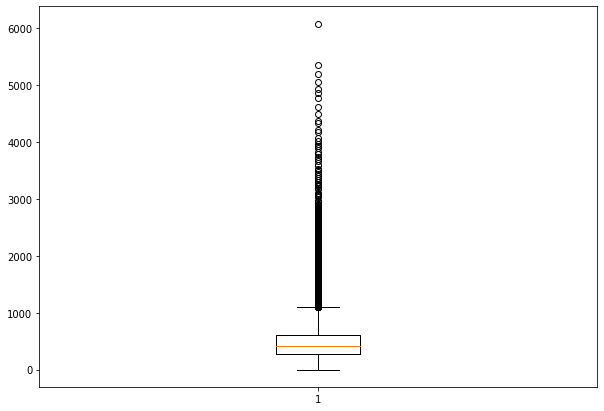

In [29]:
fig=plt.figure(figsize=(10,7))
plt.boxplot(housing['households'])
plt.show()

You can also plot all box plots, that is, a box plot for all features

In [30]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

longitude


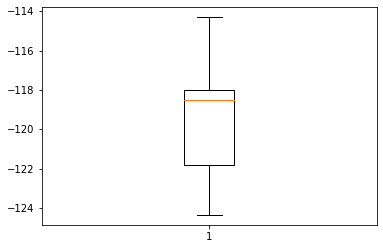

latitude


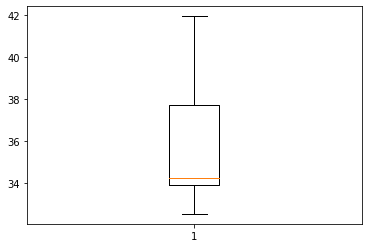

housing_median_age


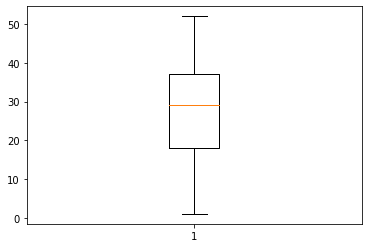

total_rooms


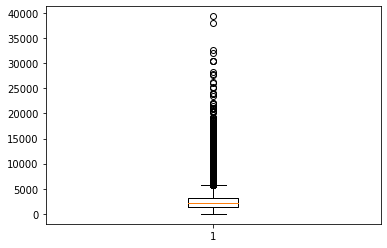

total_bedrooms


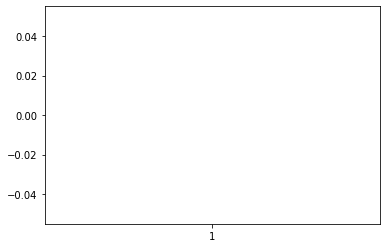

population


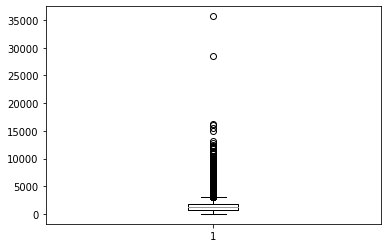

households


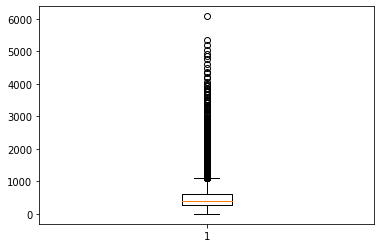

median_income


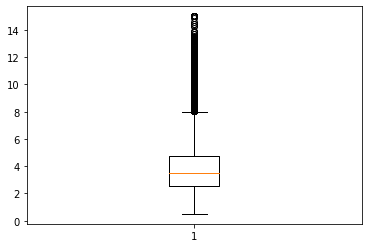

median_house_value


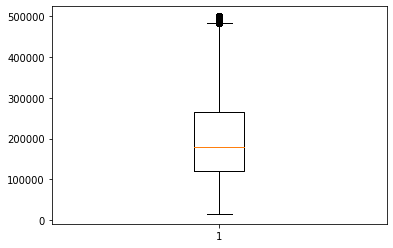

In [36]:
for col in ['longitude','latitude','housing_median_age','total_rooms',
    'total_bedrooms','population','households','median_income',
    'median_house_value']:# exlcude ocean_proximity since not numerical variable
    print(col)
    plt.boxplot(housing[col])
    plt.show()

From this output we see that all features except longitude, latitude and housing_median_age have outliers

2  Tuesday2.1  3. Data Preparation

Now that you understand what raw data you are dealing with, you have to prepare it, so that youcan train a model to predict the housing prices.Data munging, as it is sometimes called, is simultaneously the most time consuming, least re-warding, but arguably most important part of the data mining process — remember: “garbage in,garbage out!”This stage of CRISP-DM process can be broken into the following steps:• Split data into train and test sets• Clean data• Feature Engineering (Generate new variables & variable selection)• Feature Scaling2.1.1 3.1 Split data into train and test setsBefore preparing the data, it is important to split the dataset into training and testing and thenperform the preparation steps separately on those sets. This is significant so that you can evaluateyour model on unseen data (the test set) and to prevent data leakage.Remark: In Machine learning, Data Leakage refers to a mistake that is made by the creator of amachine learning model in which they accidentally share the information between the training andtest sets. Article; Data Leakage in Machine Learning:Data Leakage in Machine LearningScikit-Learn provides a few functions to split datasets into multiple subsets in various ways. Thesimplest function is train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train, test=train_test_split(housing, test_size=0.2, random_state=42)

The dataset will be split into 80% of training and the remaining 20% will be for testing. The splitis performed randomly, meaning, the node randomly selects 80% of the data. The random_stateparameter is set to a random number, so that the function always generates the same train andtest sets.You can check the size of the training and test sets with the shape() function:

In [40]:
train.shape, test.shape

((16512, 10), (4128, 10))

The training set has 16.512 rows and 10 features (or 80% of the whole dataset) and test set has4.128 rows and also 10 features (or 20% of the whole dataset).21
2.1.2 3.2 Clean data To clean the data,

you need to take care of the missing values, features containing non-numericvalues and in case of outliers, decide if you want to keep them or remove them.2.1.3 3.2.1 Handling Missing ValuesLet us start with exploring the different options of handling missing values. Generally speakingthere are three approaches to deal with missing values:• Delete missing values• Impute for missing values• Apply a ML model to predict the missing valuesLet’s take a closer look at each in turn.Delete Missing ValuesMissing values can be handled by deleting the rows or columns havingmissing values. If a column has a lot of missing values, say more than 90%, it is perhaps a good ideato drop it. Note, there is no general rule on when to drop the entire column or the rows containingmissing values, and when not. It depends on the problem.Pros:• A model trained with the removal of all missing values creates a robust model.• Easy to implement.Cons:• Loss of a lot of information.• Works poorly if the percentage of missing values is excessive in comparison to the completedataset.Imputation method for numerical columnsColumns in the dataset which are having nu-meric values can be replaced with a fixed value, the mean, median, or mode of remaining values inthe column. This method can prevent the loss of data compared to the earlier approach.Pros:• Prevent data loss which results in deletion of rows or columns• Works well with a small dataset and is easy to implement.Cons:• Works only with numerical continuous variables.• Can cause data leakage.• Do not factor the covariance between features.Remark: The covariance is a measure for how two variables are related to each other, i.e., howtwo variables vary with each other. Where the variance is the average of the squared deviation of22
a feature from its mean, the covariance is the average of the products of the deviations of featurevalues from their means;Covariance, Clearly Explained!!!Remark on Data Leakage: Suppose you filled the missing values with the mean of the total bedroomsattribute and then split the dataset into training and testing. This way, the training set containsinformation about the test set, since the mean was calculated before splitting.Imputation method for categorical columnsWhen missing values is from categoricalcolumns then the missing values can be replaced with the most frequent category. If the num-ber of missing values is very large then it can be replaced with a new category, indicating the rowswith missing values.Pros:• Prevent data loss which results in deletion of rows or columns.• Works well with a small dataset and is easy to implement.• Negates the loss of data by adding a unique categoryCons:• Works only with categorical variables.• Addition of new features to the model while encoding, which may result in poor performanceOther Imputation MethodsDepending on the nature of the data or data type, some otherimputation methods may be more appropriate to impute missing values.For example, for the data variable having longitudinal behavior, it might make sense to use the lastvalid observation to fill the missing value. This is known as the Last observation carried forward(LOCF) method.Prediction of missing valuesIn the earlier methods to handle missing values, we do not usethe correlation advantage of the variable containing the missing value and other variables. Usingthe other features which don’t have missing values can be used to predict missing values.The regression or classification model can be used for the prediction of missing values dependingon the nature (categorical or continuous) of the feature having missing value.Pros:• Gives a better result than earlier methods.Takes into account the covariance between the missing value column and other columns.Cons:• Considered only as a proxy for the true values.Note that, there is no right or wrong when handling missing values, meaning, there is no guaranteethat if you use a specific imputation method, your model will perform better. It depends on theproblem, the data etc. Sometimes, you have to try a couple of them and see, what gives you thebest result.23
Now that we have explored the options of handling missing values, let us continue with the studyand figure out, which approach to apply.From the previous sub-section you know, that the feature total_bedrooms contains missing values.In particular, it has 207 missing values that accounts to 1%. Since the amount of missing values isnot much, you can either drop the rows or replace the missing values by for example the mean ormedian.Let us go ahead and replace the missing values. Now, mean or median?Both the mean and median describe the center of a feature. While the mean considers all thevalues, the median value only considers a subset of values. This is because the median basicallydiscards all values except for the most central value(s).This brings us to the question: when to use the mean and when to use the median? The answeris simple. If your data contains outliers, then you would typically rather use the median becauseotherwise the value of the mean would be dominated by the outliers rather than the typical values.During the Data Understanding phase, you know that the feature total_bedroom has outliers,so you should use the median. Scikit-Learn provides a handy class to take care of missing values:SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifyingthat you want to replace each attribute’s missing values with the median of that attribute

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer=SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of thedata without the text attribute ocean_proximity

In [43]:
train_num=train.drop("ocean_proximity", axis=1)

Now you can fit the imputer instance to the training data using the fit() method

In [45]:
imputer.fit(train_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statis-tics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot besure that there won’t be any missing values in new data after the system goes live, so it is safer toapply the imputer to all the numerical attributes

In [46]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [47]:
train_num.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

Now you can use this “trained” imputer to transform the training set by replacing missing valuesby the learned medians:

In [48]:
X=imputer.transform(train_num)

The result is a plain NumPy array containing the transformed features. If you want to put it backinto a Pandas DataFrame, it’s simple:

In [49]:
train_tr=pd.DataFrame(X, columns=train_num.columns)

2.1.4 3.2.2 Handling Categorical Features 

Most Machine learning models require all input and output variables to be numeric. This meansthat if your data contains categorical data, you must encode it to numbers before you can fit andevaluate a model.As mentioned before, categorical data are variables that contain label values or categories. Thenumber of possible values is often limited to a fixed set. Categorical variables are often callednominal. An example of a categorical variable is Gender with two categories; Female and Male.As for missing values, we first explore what options we have to transform categorical values tonumbers. 
We will explore three common approaches:
Ordinal Encoding• One-Hot Encoding• Target Encoding

Let’s take a closer look at each in turn.Ordinal EncodingIn ordinal encoding, each unique category value is assigned an integer value.For example, “male” is 1, “female” is 2, or “good” is 1, “medium” is 2 and “bad” is 3.The integer values have a natural ordered relationship between each other and machine learningalgorithms may be able to understand and harness this relationship. Therefore, this approachmakes sense if the categories of a categorical feature have a natural relationship to each other, suchas a natural ordering. These kind of categorical features are called ordinal features. Example:“good” is 3, “medium” is 2 and “bad” is 1.In case of categorical features with values where there is no relationship between the values (exampleGender), this can cause problems and a one-hot encoding may be used instead which we explorenext.One-Hot EncodingOne-Hot Encoding is the most common way to deal with non-ordinal cate-gorical data. It consists of creating an additional feature for each category of the categorical featureand mark each observation belonging (Value=1) or not (Value=0) to that group.It is best explained with an example, thus let us consider the variable Gender. Suppose we have adataset which consists of 5 people, either being male or female. One-Hot Encoding adds two newcolumns; male and female:25
Gender  Male  FemaleMale10Female   01Female   01Male10Female   01This approach is able to encode categorical features properly, but if a categorical feature has alarge number of possible categories (e.g., 100), then one-hot encoding will result in a large numberof input features. This may slow down training and degrade performance. If this happens, youmay want to replace the categorical input with useful numerical features related to the categories,which we will explore next.Target EncodingA lesser known, but very effective way of handling categorical variables, isTarget Encoding. It consists of substituting each category in a categorical feature with the averageresponse in the target variable.The process to obtain the Target Encoding is relatively straightforward and it can be summarizedas:• Group the data by category• Calculate the average of the target variable per each group• Assign the average to each observation belonging to that groupNow that we know what options we have to handle categorical features, we continue with the project.From the Data Understanding phase you know that the attribute ocian_proximity is a categoricalfeature with categories: <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND. Let usexplore the options.We can perhaps treat the variable as an ordinal one. For example, we replace the categories withintegers, starting at 0 and increasing as closer we get to the ocean. But this will introduce arelationship among the categories that the ML model might learn, e.g., that it is preferable beingclose to the ocean. Since we don’t know if that is the case, that approach might be misleading.Since the number of categories are moderate, i.e., 5, the better approach would be one-hot encoding.Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors

In [50]:
train_cat=train[["ocean_proximity"]]

In [51]:
train_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
cat_encoder=OneHotEncoder()
train_cat_1hot=cat_encoder.fit_transform(train_cat)
train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very usefulwhen you have categorical attributes with thousands of categories. After onehot encoding we geta matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row.Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrixonly stores the location of the non-zero elements. You can use it mostly like a normal 2D array,but if you really want to convert it to a (dense) NumPy array, just call the toarray() method

In [55]:
train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

You can get the list of categories using the encoder’s categories_instance variable:

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]